In [25]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statistics import mean
warnings.filterwarnings('ignore')

In [56]:
df_train = pd.read_csv("challenge_train.csv")
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,NaN,3201
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,1332
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                1933 non-null   float64
 2   Brand              1921 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  1925 non-null   object 
 7   ID                 2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


In [58]:
df_train.describe()

,Mileage,Age,Horsepower,Price,Accidents_History,ID
count,2000.000000,1933.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,47371.271244,4.901168,140.571945,16286.915618,0.51100,4970.844000
std,21094.525714,2.890400,67.811117,11201.085165,0.70649,2915.969163
min,-74007.968084,0.007267,-257.937259,-4234.207009,0.00000,4.000000
25%,38666.978977,2.348844,109.931002,11464.115851,0.00000,2461.750000
50%,49345.990091,4.843951,144.027053,15396.886224,0.00000,4816.500000
75%,59000.476654,7.439484,180.082763,18697.747795,1.00000,7543.750000
max,107024.903225,9.999566,295.591933,91450.965098,4.00000,9997.000000


In [59]:
df_train["Last_Service_Date"].fillna("0000-00-00", inplace=True)
df_train[["Year", "Month", "Day"]] = df_train["Last_Service_Date"].str.split("-", expand=True)
df_train[["Year"]] = df_train[["Year"]].astype("int")
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID,Year,Month,Day
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350,2020,10,31
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684,2022,12,27
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,0000-00-00,3201,0,00,00
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,1332,2022,08,26
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724,2021,12,22


In [60]:
df_train.drop(columns=["ID", "Month", "Day"], inplace=True)
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,Year
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,2020
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2022
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,0000-00-00,0
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,2022
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2021


In [61]:
df_train["Brand"].fillna("Unknown", inplace=True)
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,Year
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,2020
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2022
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,0000-00-00,0
3,58520.110388,2.806898,Unknown,155.824358,11785.969236,0,2022-08-26,2022
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2021


In [62]:
df_train["Brand"].value_counts()

Brand
Toyota     633
Ford       616
BMW        575
Unknown     79
toyota      39
ford        32
bmw         26
Name: count, dtype: int64

In [63]:
df_train["Brand"][df_train["Brand"] == "bmw"] = "BMW"
df_train["Brand"][df_train["Brand"] == "toyota"] = "Toyota"
df_train["Brand"][df_train["Brand"] == "ford"] = "Ford"
df_train["Brand"].value_counts()

Brand
Toyota     672
Ford       648
BMW        601
Unknown     79
Name: count, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                2000 non-null   float64
 2   Brand              2000 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  2000 non-null   object 
 7   Year               2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


In [65]:
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,Year
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,2020
1,52160.653567,1.452421,Ford,182.782369,17351.677402,1,2022-12-27,2022
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,0000-00-00,0
3,58520.110388,2.806898,Unknown,155.824358,11785.969236,0,2022-08-26,2022
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2021


In [68]:
# Convert object values to numeric values using LaberEncoder
for col in df_train.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df_train[col].unique())
    df_train[col] = label_encoder.transform(df_train[col])

In [72]:
df_train.describe()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,Year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,47371.271244,4.899251,1.114500,140.571945,16286.915618,0.51100,427.833500,1945.896000
std,21094.525714,2.841567,0.884184,67.811117,11201.085165,0.70649,269.005451,384.188826
min,-74007.968084,0.007267,0.000000,-257.937259,-4234.207009,0.00000,0.000000,0.000000
25%,38666.978977,2.465777,0.000000,109.931002,11464.115851,0.00000,191.750000,2021.000000
50%,49345.990091,4.843951,1.000000,144.027053,15396.886224,0.00000,419.500000,2022.000000
75%,59000.476654,7.359614,2.000000,180.082763,18697.747795,1.00000,669.250000,2022.000000
max,107024.903225,9.999566,3.000000,295.591933,91450.965098,4.00000,897.000000,2023.000000


In [79]:
df = df_train.copy()
df.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,Year
0,4307.854178,4.843951,0,246.315008,17072.488092,1,27,2020
1,52160.653567,1.452421,1,182.782369,17351.677402,1,677,2022
2,42237.214362,5.673198,0,22.188980,9203.644481,3,0,0
3,58520.110388,2.806898,3,155.824358,11785.969236,0,578,2022
4,60376.767928,3.599798,1,155.421041,14663.608320,3,376,2021


In [80]:
# Normalization values 
X = df[["Mileage", "Age", "Brand", "Horsepower", "Accidents_History", "Year"]]
y = df[["Price"]]

In [81]:
X.head()

,Mileage,Age,Brand,Horsepower,Accidents_History,Year
0,4307.854178,4.843951,0,246.315008,1,2020
1,52160.653567,1.452421,1,182.782369,1,2022
2,42237.214362,5.673198,0,22.188980,3,0
3,58520.110388,2.806898,3,155.824358,0,2022
4,60376.767928,3.599798,1,155.421041,3,2021


In [82]:
y.head()

,Price
0,17072.488092
1,17351.677402
2,9203.644481
3,11785.969236
4,14663.608320


In [83]:
# Scalling the data 
standard = StandardScaler()
X = standard.fit_transform(X)
y = y.values

In [87]:
# Split data to train dataset and test dataset 
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of x_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1340, 6)
Shape of y_train:  (1340, 1)
Shape of x_test:  (660, 6)
Shape of y_test:  (660, 1)


In [88]:
# test model with Linear Regression 
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred_y = linear.predict(X_test)
print('R2_score: ', r2_score(y_test, linear_pred_y))
print("Mean absolute error: ", mean_absolute_error(y_test, linear_pred_y))
print("Mean squared error: ", mean_squared_error(y_test, linear_pred_y))

R2_score:  0.7616283616139163
Mean absolute error:  3862.5735668812645
Mean squared error:  27807757.00867576


In [89]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 75.56545240037931
0.5 : 75.56595380038155
0.75 : 75.5664530712319
1.0 : 75.56695021472906
1.25 : 75.5674452326697
1.5 : 75.56793812684855
1.75 : 75.56842889905842
2.0 : 75.56891755109014


In [121]:
# Test
# Normalization values 
X = df[["Mileage", "Age", "Brand", "Horsepower", "Accidents_History", "Year"]]
y = df[["Price"]]

In [122]:
# Apply PCA
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions
X_pca = pca.fit_transform(X)

In [123]:
# Scalling the data 
standard = StandardScaler()
X = standard.fit_transform(X)
y = y.values

In [124]:
# Split data to train dataset and test dataset 
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of x_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1340, 6)
Shape of y_train:  (1340, 1)
Shape of x_test:  (660, 6)
Shape of y_test:  (660, 1)


In [125]:
# test model with Linear Regression 
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred_y = linear.predict(X_test)
print('R2_score: ', r2_score(y_test, linear_pred_y))
print("Mean absolute error: ", mean_absolute_error(y_test, linear_pred_y))
print("Mean squared error: ", mean_squared_error(y_test, linear_pred_y))


R2_score:  0.7616283616139163
Mean absolute error:  3862.5735668812645
Mean squared error:  27807757.00867576


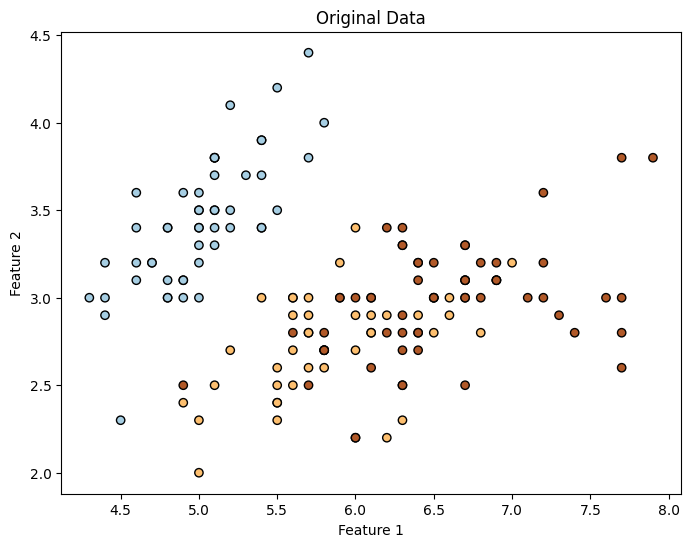

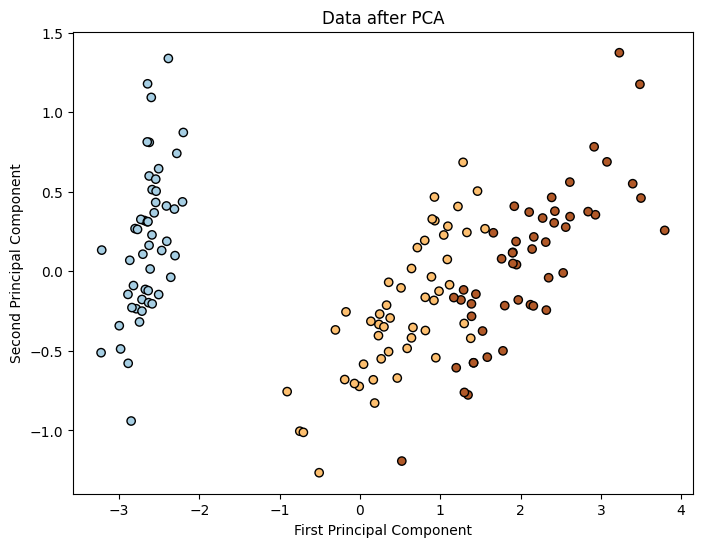

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Visualize the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()

# Visualize the data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data after PCA')
plt.show()
